# SNR til 1kHz

SNR: 28.97 dB


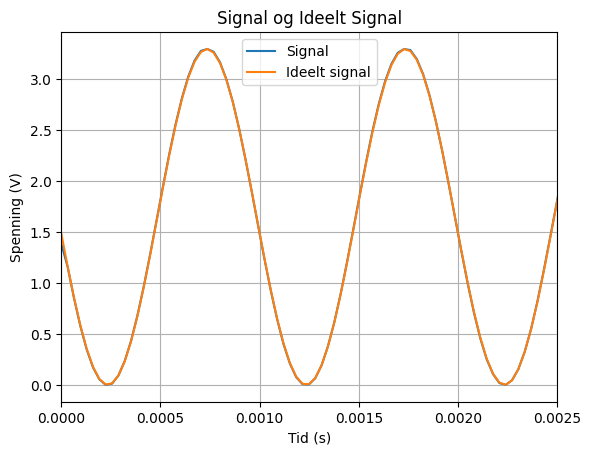

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from raspi_import import raspi_import

channels = 3 
freqIn = 1000   
periodsCount = 10
periodTime = 1 / freqIn 
rangePeriod = periodsCount * periodTime 
sample_period, data = raspi_import(f'Målinger/test4.bin', channels)

time_axis = np.arange(data.shape[0]) * sample_period
# Konverteringsfunksjon
C = 3.3  
def converter(data): 
    resolution = 2**12
    Vconv = (C / resolution * data)
    return Vconv


# Generer det ideelle signalet med samme lengde som data
f_ideal = 1.65 * (-np.sin(2 * np.pi * freqIn * time_axis + np.pi/32)) + 1.65

signal = converter(data[:, 0])

noise = signal - f_ideal

signal_rms = np.sqrt(np.mean(signal**2))
noise_rms = np.sqrt(np.mean(noise**2))

SNR = 20 * np.log10(signal_rms / noise_rms)

print(f'SNR: {SNR:.2f} dB')

plt.plot(time_axis, signal, label='Signal')
plt.plot(time_axis, f_ideal, label='Ideelt signal')
plt.xlabel('Tid (s)')
plt.ylabel('Spenning (V)')
plt.title('Signal og Ideelt Signal')
plt.legend()
plt.grid()
plt.xlim(0, rangePeriod/4)
plt.show()


